# **Case Study: Linear Regression using Gradient Descent**

### 1. **Introduction** 
This case study explores the implementation of linear regression using the Gradient Descent optimization algorithm. Linear regression is a fundamental statistical method used to model the linear relationship between a dependent variable (target) and one or more independent variables (features). Gradient Descent is an iterative optimization algorithm employed to find the optimal parameters (coefficients) of the linear model that minimize a cost function.

This study uses synthetically generated data to demonstrate the core principles of linear regression and the mechanics of the Gradient Descent algorithm. The process involves generating a dataset with a known linear relationship, initializing model parameters randomly, and iteratively updating these parameters based on the gradient of the cost function with respect to the parameters. The convergence of the algorithm and the final fitted regression line are visualized to provide a clear understanding of the process.

### 2. **Methodology** 
The core objective is to find the optimal values for the intercept and slope of a linear equation that best fits the given data points. This is achieved by minimizing the Sum of Squared Errors (SSE) between the predicted values and the actual values. The Gradient Descent algorithm provides a systematic way to reach this minimum.

> 2.1 **Data Generation**
>
>A synthetic dataset was generated to simulate a linear relationship with added Gaussian noise. This allows for controlled experimentation and a clear understanding of how the algorithm performs in the presence of noise. The data was generated using the following parameters:
>
> * Number of data points (m): 100
> * True slope: 2.5
> * True intercept: 3.5
> * Feature values (X): Randomly generated values between 0 and 2.
> * Target values (Y): Calculated based on the true slope, intercept, feature values, and added random Gaussian noise.
>
> The equation representing the underlying true relationship is:
> $$ \text{Y} = 2.5\text{X} + 3.5 + \epsilon $$
>
> where $ \epsilon $ represents the Gaussian noise.
>
> 2.2 **Linear Regression Model**
>
> The linear regression model aims to find a line that best approximates the relationship between X and Y. The model can be represented as:
> $$
\hat{Y} = \beta_0 + \beta_1 X
$$
> where:
> * $ \hat{Y} $ is the predicted value of Y.
> * $\beta_0 $ is the intercept (the value of Y when X is 0).
> * $ \beta_1 $ is the slope (the change in Y for a unit change in X).
>   
> To facilitate vectorized computation, a bias term $(\text{X}_0 = 1 )$ is added to the feature matrix, and the parameters are represented as a vector
> $
\beta = \begin{bmatrix}
\beta_0 \\
\beta_1
\end{bmatrix} $ . The prediction can then be written as:
> 
> $ \hat{Y} = \text{X}_b\beta $
>
> where $ \text{X}_b\beta = \begin{bmatrix} 1 \quad \text{X}_1 \\ 1 \quad \text{X}_2 \\ . \quad . \\ . \quad . \\ . \quad . \\ 1 \quad \text{X}_n \end{bmatrix}$
>
> 2.3 **Cost Function**
> 
> The performance of the linear regression model is evaluated using a cost function. In this case, the Mean Squared Error (MSE) is used, which is the average of the squared differences between the predicted and actual values:
>
> $$
J(\beta) = \frac{1}{m}\sum_{i=1}^{m}(\hat{Y}_i - Y_i)^2 = \frac{1}{m}\sum_{i=1}^{m}(Xb^{(i)}\beta - Y_i)^2
$$
> The goal of Gradient Descent is to find the values of $ \beta_0 $ and $ \beta_1 $ that minimize this cost function.
>
> 2.4 **Gradient Descent Algorithm**
>
> Gradient Descent is an iterative optimization algorithm that moves towards the minimum of a function by taking steps proportional to the negative of the gradient at the current point. In the context of linear regression, the gradient of the cost function with respect to the parameters $ \beta $ is calculated:
> $$
\nabla_\beta J(\beta) = \frac{2}{m}Xb^T(Xb\beta - Y)
$$
> The parameters are then updated iteratively using the following rule:
>
> $$
\beta_{new} = \beta_{old} - \alpha\nabla_\beta J(\beta_{old})
$$
> where $ \alpha $ is the learning rate, which determines the size of the steps taken in each iteration. A smaller learning rate can lead to slower convergence but may prevent overshooting the minimum, while a larger learning rate can lead to faster convergence but risks overshooting.
>
> The algorithm proceeds as follows:
>
> * Initialize the parameters $ \beta $ with random values.
> * Iteratively calculate the gradient of the cost function with respect to $ \beta $.
> * Update the parameters $ \beta $ by subtracting the product of the learning rate and the gradient.
> * Repeat steps 2 and 3 for a predefined number of iterations or until the cost function converges to a minimum value.
>
> <img src="https://media5.datahacker.rs/2021/10/116-1536x439.jpg" alt="Learning Rate alpha" title="Learning Rate Curve" />

### 3. **Implementation Details** 

The Python code provided implements the Gradient Descent algorithm for linear regression. Key steps in the implementation include:

> 1. **Data Generation:**
> Using NumPy's random functions to create the feature matrix `X` and the target vector `Y` based on the specified true parameters and noise.
>
> 2. **Bias Term Addition:** Adding a column of ones to the feature matrix `X` to create `X_b`, which allows for the intercept term to be included in the matrix multiplication.

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#Generate Synthetc Data
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m,1) #Feature values

true_slope = 2.5
true_intercept = 3.5  
noise = np.random.randn(m, 1) #gaussian noise

Y = true_slope * X + true_intercept + noise  # Linear relation

# Add bias term (X0 = 1) for vectorized implementation
X_b = np.c_[np.ones((m, 1)), X]  # Shape (m, 2)

> 3. **Parameter Initialization:** Initializing the parameter vector `beta` with random values using `np.random.randn(2, 1)`.
>
> 4. **Gradient Descent Loop:** Iterating for a specified number of num_iterations. In each iteration:
>
>    * **Gradient Calculation:** Computing the gradient of the cost function using the formula derived in the methodology section.
>    * **Parameter Update:** Updating the beta vector by subtracting the learning rate multiplied by the gradient.
>    * **Cost Calculation:** Computing the MSE and storing it in cost_history to track the convergence of the algorithm.

In [23]:
# Initialize parameters
beta = np.random.randn(2, 1)  # Random initialization (2 parameters: intercept & slope)
# print(beta)
learning_rate = 0.1
num_iterations = 50
m = len(X_b)  # Number of samples

# Store cost for visualization
cost_history = []

# Gradient Descent Algorithm
for iteration in range(num_iterations):
    gradients = (2/m) * X_b.T @ (X_b @ beta - Y)  # Compute gradient
    beta -= learning_rate * gradients  # Update parameters

    # Compute cost (Sum of Squared Errors)
    cost = np.mean((X_b @ beta - Y) ** 2)
    cost_history.append(cost)

> 5. **Output:** Printing the final estimated intercept and slope. 
> 6. **Visualization:** 

In [24]:
# Print final parameters
print(f"Final parameters: Intercept = {beta[0][0]}, Slope = {beta[1][0]}")

Final parameters: Intercept = 3.394461260744738, Slope = 2.55321657224156


### 4. **Results and Discussion** 

> 4.1 **Convergence of Cost Function** - 
> The first plot generated visualizes the cost (MSE) as a function of the number of iterations. This plot demonstrates how the Gradient Descent algorithm iteratively reduces the error between the model's predictions and the actual data.

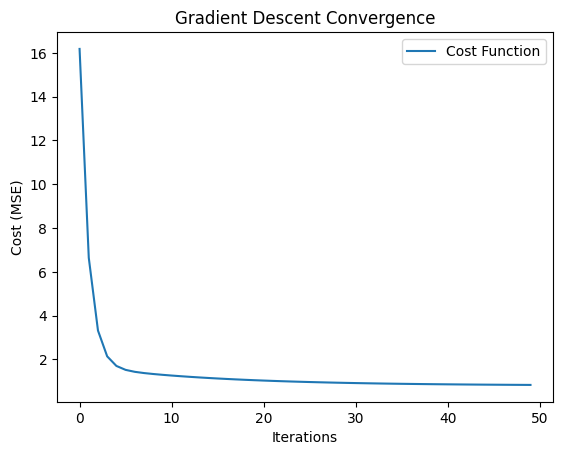

In [25]:
# Plot convergence of cost function
plt.plot(range(num_iterations), cost_history, label="Cost Function")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Convergence")
plt.legend()
plt.show()

As seen in the plot, the cost function typically starts at a higher value (due to the initial random parameter values) and then decreases steadily over the iterations. The rate of decrease is usually faster in the initial iterations and slows down as the algorithm approaches the minimum. A smooth and consistent decrease in the cost function indicates that the Gradient Descent algorithm is working correctly and converging towards the optimal solution. The final value of the cost function represents the minimum error achieved by the model.

> 4.2 **Fitted Regression Line** - The second plot shows the original data points (scatter plot) along with the regression line fitted by the Gradient Descent algorithm. This visualization provides a clear picture of how well the linear model approximates the relationship in the data.

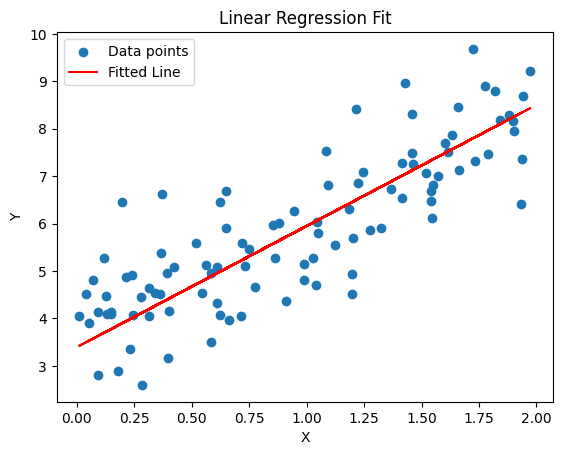

In [26]:
# Plot regression line
plt.scatter(X, Y, label="Data points")
plt.plot(X, X_b @ beta, color='red', label="Fitted Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

The fitted red line represents the linear equation $
\hat{Y} = \beta_0 + \beta_1 X
$ where $\beta_0$ and $\beta_1$ are the final parameter values obtained after running the Gradient Descent algorithm. The closer the fitted line passes to the data points, the better the model's fit to the data. Some deviation is expected due to the added noise in the synthetic data.

The printed final parameters (intercept and slope) should be close to the true parameters (3.5 and 2.5, respectively), demonstrating that the Gradient Descent algorithm has successfully learned the underlying linear relationship in the data. The small differences are due to the inherent noise in the generated data and the fact that Gradient Descent converges to a local (and in this convex case, global) minimum, but might not exactly recover the true parameters.

### 5. **Conclusion** 
This case study successfully demonstrates the implementation of linear regression using the Gradient Descent algorithm. By generating synthetic data with a known linear relationship and applying Gradient Descent, we were able to:
* Initialize model parameters randomly.
* Iteratively update these parameters based on the gradient of the cost function (MSE).
* Observe the convergence of the cost function over iterations, indicating the algorithm's progress in minimizing the error.
* Obtain final parameter estimates (intercept and slope) that closely approximate the true underlying parameters.
* Visualize the fitted regression line, showing how well the linear model captures the trend in the data.

The use of visualizations, such as the cost function convergence plot and the fitted regression line plot, provides valuable insights into the behavior and performance of the Gradient Descent algorithm in the context of linear regression. This study highlights the fundamental principles of optimization in machine learning and the effectiveness of Gradient Descent for finding optimal model parameters. Further studies could explore the impact of different learning rates, the number of iterations, and the application of Gradient Descent to more complex datasets and models.